In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
advertising_df = pd.read_csv("Advertising_2023.csv", header=0, index_col=0)
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [51]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [52]:
# Provides a statistical summary of the numerical columns in the dataset

advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [53]:
# Number of rows and columns in the dataset
advertising_df.shape

(1199, 5)

In [54]:
# Check for null values in the dataset
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [55]:
# Splitting the data into input features and the output feature

X = advertising_df[[column for column in advertising_df.columns if column!="sales"]]
y = advertising_df[["sales"]]

In [56]:
import keras

In [57]:
# Normalization of features

normalized_feature = keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [58]:
# Splitting the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=44)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(839, 4)
(360, 4)
(839, 1)
(360, 1)


In [60]:
from keras.models import Sequential
from keras.layers import Dense

#### Building our model

In [61]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

In [62]:
# compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [63]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32)

Epoch 1/32


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1769.8162 - mse: 1769.8162 - val_loss: 953.7638 - val_mse: 953.7638
Epoch 2/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 877.1382 - mse: 877.1382 - val_loss: 404.6704 - val_mse: 404.6704
Epoch 3/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 351.2867 - mse: 351.2867 - val_loss: 171.5283 - val_mse: 171.5283
Epoch 4/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.5507 - mse: 151.5507 - val_loss: 93.5630 - val_mse: 93.5630
Epoch 5/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.0176 - mse: 85.0176 - val_loss: 65.7250 - val_mse: 65.7250
Epoch 6/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.0795 - mse: 65.0795 - val_loss: 52.4833 - val_mse: 52.4833
Epoch 7/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.0953 - mse: 55.0953 - val_loss: 44.9221 - val_mse: 44.9221
Epoch 8/32
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.9502 - mse: 46.9502 - val_loss: 40.1883 - val_mse: 40.1883
Epoch 9/32
27/27 ━━━━━━━━━━━━━━━━━

### Visualizing the training and validation loss

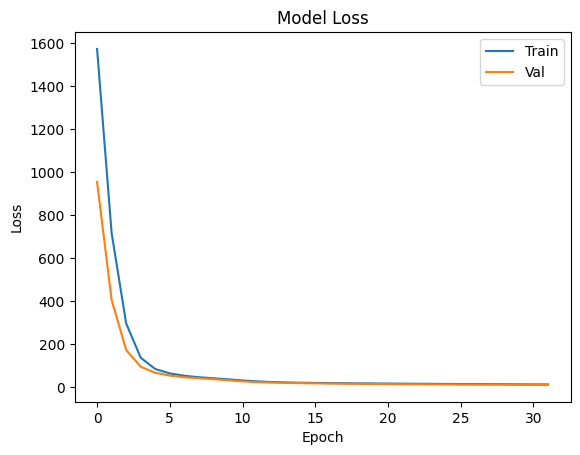

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

### Predicting the sales

In [65]:
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[ 8.296038   6.0727143 19.140068   5.6723313 11.64976   16.12476
 14.367706  12.135732  20.213488  22.501287   9.59791    3.5529416
  6.7578087  5.705772  20.39366    3.708285   3.708285   7.63617
 22.018599  17.420248   9.239726  19.837954  26.669567  12.370348
 12.370348   8.356253  20.213488   3.8266118  7.856654  15.56279
 12.214059   1.6014277 17.742887  23.041204   8.457069   8.100206
 16.703817  18.981663   5.810927  11.019914  15.293753  18.466848
 16.582026  14.547771   3.6135337  3.8024054 20.469305  18.305023
 20.025488  16.895     14.346241  13.91067   16.90724   19.014814
  6.8437696 19.842505  18.736269   3.5415294 17.892792   9.98677
 16.299028  13.507931   3.826612  18.627775  10.229587  15.59009
 14.957917   7.2035847 14.492968   5.2539763  9.322347  14.740234
  7.011563  18.517786  12.097805   3.2130277 14.120421   1.8966192
 21.335882  12.326294   7.229602  13.154479  22.232256  16.881153
  6.602236  12.566606  17.558756  19.485

In [66]:
print(test_predictions)

[ 8.296038   6.0727143 19.140068   5.6723313 11.64976   16.12476
 14.367706  12.135732  20.213488  22.501287   9.59791    3.5529416
  6.7578087  5.705772  20.39366    3.708285   3.708285   7.63617
 22.018599  17.420248   9.239726  19.837954  26.669567  12.370348
 12.370348   8.356253  20.213488   3.8266118  7.856654  15.56279
 12.214059   1.6014277 17.742887  23.041204   8.457069   8.100206
 16.703817  18.981663   5.810927  11.019914  15.293753  18.466848
 16.582026  14.547771   3.6135337  3.8024054 20.469305  18.305023
 20.025488  16.895     14.346241  13.91067   16.90724   19.014814
  6.8437696 19.842505  18.736269   3.5415294 17.892792   9.98677
 16.299028  13.507931   3.826612  18.627775  10.229587  15.59009
 14.957917   7.2035847 14.492968   5.2539763  9.322347  14.740234
  7.011563  18.517786  12.097805   3.2130277 14.120421   1.8966192
 21.335882  12.326294   7.229602  13.154479  22.232256  16.881153
  6.602236  12.566606  17.558756  19.485704   3.111938  17.010286
  8.942587  1

In [75]:
true_values = [el[0] for el in np.array(y_test)]

true_predicted = pd.DataFrame(zip(true_values,test_predictions) , columns=["True Values", "Predicted Values"])

true_predicted.head()

,True Values,Predicted Values
0,9.6,8.296038
1,8.7,6.072714
2,22.3,19.140068
3,1.6,5.672331
4,11.7,11.649760


### Performance evaluation metrices

In [76]:
from sklearn.metrics import mean_squared_error

pred_train = model.predict(X_train)
print(f"The root mean squared error for training is: {np.sqrt(mean_squared_error(y_train, pred_train))}")

print(f"The root mean squared error for testing is: {np.sqrt(mean_squared_error(y_test, test_predictions))}")



27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
The root mean squared error for training is: 3.3166569053027923
The root mean squared error for testing is: 2.997676787459182
